In [37]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15', # set limit, larger limit = longer run time
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '--hidden--',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

{'status': {'timestamp': '2024-08-24T07:01:16.445Z', 'error_code': 0, 'error_message': None, 'elapsed': 48, 'credit_count': 1, 'notice': None, 'total_count': 9989}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11649, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [38]:
type(data)

dict

In [39]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [40]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now',utc=True)
df['timestamp'] = df['timestamp'].dt.tz_convert('Asia/Manila')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11649,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.974436e+07,1.974436e+07,False,NaN,1,NaN,NaN,None,2024-08-24T07:00:00.000Z,64101.067484,4.314973e+10,65.5218,0.103580,4.759130,8.321621,-0.326554,4.896385,-7.209819,1.265635e+12,56.0997,1.346122e+12,None,2024-08-24T07:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-24 15:01:49.346366+08:00
1,1027,Ethereum,ETH,ethereum,9243,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202985e+08,1.202985e+08,True,NaN,2,NaN,NaN,None,2024-08-24T06:59:00.000Z,2758.189107,1.588871e+10,38.0101,0.064555,2.864047,6.157310,-13.000638,-18.136397,-26.599790,3.318059e+11,14.7103,3.318059e+11,None,2024-08-24T06:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-24 15:01:49.346366+08:00
2,825,Tether USDt,USDT,tether,95298,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.176760e+11,1.202564e+11,True,NaN,3,NaN,NaN,None,2024-08-24T06:59:00.000Z,1.000604,6.642289e+10,46.6336,0.004068,0.054441,0.021257,0.076003,0.105570,0.096373,1.177471e+11,5.2202,1.203290e+11,None,2024-08-24T06:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-24 15:01:49.346366+08:00
3,1839,BNB,BNB,bnb,2218,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459355e+08,1.459355e+08,False,NaN,4,NaN,NaN,None,2024-08-24T06:59:00.000Z,576.686430,2.097552e+09,1.8713,-0.475021,-0.860186,10.517470,2.446807,0.743993,-4.196254,8.415901e+10,3.7304,8.415901e+10,None,2024-08-24T06:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-24 15:01:49.346366+08:00
4,5426,Solana,SOL,solana,721,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.659278e+08,5.828834e+08,True,NaN,5,NaN,NaN,None,2024-08-24T06:59:00.000Z,154.257595,2.793021e+09,96.2408,-0.258604,5.905142,10.915024,-10.047514,13.529870,-7.077169,7.187290e+10,3.1862,8.991419e+10,None,2024-08-24T06:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-24 15:01:49.346366+08:00
5,3408,USDC,USDC,usd-coin,21659,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.492038e+10,3.492038e+10,False,NaN,6,NaN,NaN,None,2024-08-24T06:59:00.000Z,0.999957,8.309989e+09,68.9209,0.009693,0.004813,-0.017204,-0.002635,-0.006755,0.004947,3.491887e+10,1.5478,3.491887e+10,None,2024-08-24T06:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-24 15:01:49.346366+08:00
6,52,XRP,XRP,xrp,1370,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.618009e+10,9.998732e+10,False,NaN,7,NaN,NaN,None,2024-08-24T07:00:00.000Z,0.611355,1.173658e+09,23.0329,0.377618,1.699991,8.161270,-0.015825,28.512818,13.627564,3.434599e+10,1.5227,6.113552e+10,None,2024-08-24T07:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-24 15:01:49.346366+08:00
7,11419,Toncoin,TON,toncoin,523,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.527144e+09,5.110991e+09,True,NaN,8,3.414167e+09,2.287231e+10,None,2024-08-24T06:59:00.000Z,6.699237,2.597860e+08,31.9184,0.203131,1.442297,2.595289,1.197243,-11.815378,5.250852,1.692994e+10,0.7504,3.423974e+10,None,2024-08-24T06:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-24 15:01:49.346366+08:00
8,74,Dogecoin,DOGE,dogecoin,1044,2013-12-15T00:00:00.000Z,"[mineable,

In [41]:
#create a function to automate it to run every x hours
def api_runner():
    global df # df is declared as a global variable
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15', # set limit, larger limit = longer run time
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '--hidden--',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now',utc=True)
    df2['timestamp'] = df2['timestamp'].dt.tz_convert('Asia/Manila')
    df = pd.concat([df, df2], ignore_index=True)
    
    if not os.path.isfile(r'C:\Users\Evann Lim\Documents\DATA ANALYSIS\Python\Crypto Website API\API.csv'): 
        df.to_csv(r'C:\Users\Evann Lim\Documents\DATA ANALYSIS\Python\Crypto Website API\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\Evann Lim\Documents\DATA ANALYSIS\Python\Crypto Website API\API.csv', mode = 'a', header = False)
    #check if there is a file here, if not, create a new csv file with header of column_names
    # if there is the csv file there, append new data

In [42]:
import os
from time import time, sleep

for i in range(333):  # 333 runs per day
    api_runner()
    print(f'API Runner Completed Successfully - Run {i + 1} of 333')
    sleep(60)  # sleep for 1 minute

exit()


API Runner Completed Successfully - Run 1 of 333
API Runner Completed Successfully - Run 2 of 333
API Runner Completed Successfully - Run 3 of 333
API Runner Completed Successfully - Run 4 of 333
API Runner Completed Successfully - Run 5 of 333


KeyboardInterrupt: 

In [43]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11649,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.974436e+07,1.974436e+07,False,NaN,1,NaN,NaN,None,2024-08-24T07:00:00.000Z,64101.067484,4.314973e+10,65.5218,0.103580,4.759130,8.321621,-0.326554,4.896385,-7.209819,1.265635e+12,56.0997,1.346122e+12,None,2024-08-24T07:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-24 15:01:49.346366+08:00
1,1027,Ethereum,ETH,ethereum,9243,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202985e+08,1.202985e+08,True,NaN,2,NaN,NaN,None,2024-08-24T06:59:00.000Z,2758.189107,1.588871e+10,38.0101,0.064555,2.864047,6.157310,-13.000638,-18.136397,-26.599790,3.318059e+11,14.7103,3.318059e+11,None,2024-08-24T06:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-24 15:01:49.346366+08:00
2,825,Tether USDt,USDT,tether,95298,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.176760e+11,1.202564e+11,True,NaN,3,NaN,NaN,None,2024-08-24T06:59:00.000Z,1.000604,6.642289e+10,46.6336,0.004068,0.054441,0.021257,0.076003,0.105570,0.096373,1.177471e+11,5.2202,1.203290e+11,None,2024-08-24T06:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-24 15:01:49.346366+08:00
3,1839,BNB,BNB,bnb,2218,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459355e+08,1.459355e+08,False,NaN,4,NaN,NaN,None,2024-08-24T06:59:00.000Z,576.686430,2.097552e+09,1.8713,-0.475021,-0.860186,10.517470,2.446807,0.743993,-4.196254,8.415901e+10,3.7304,8.415901e+10,None,2024-08-24T06:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-24 15:01:49.346366+08:00
4,5426,Solana,SOL,solana,721,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.659278e+08,5.828834e+08,True,NaN,5,NaN,NaN,None,2024-08-24T06:59:00.000Z,154.257595,2.793021e+09,96.2408,-0.258604,5.905142,10.915024,-10.047514,13.529870,-7.077169,7.187290e+10,3.1862,8.991419e+10,None,2024-08-24T06:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-24 15:01:49.346366+08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1958,TRON,TRX,tron,1015,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.686510e+10,8.686515e+10,True,NaN,11,7.165966e+10,1.154572e+10,None,2024-08-24T07:04:00.000Z,0.161119,8.705451e+08,-7.7102,-1.057844,4.261697,19.756541,18.864589,33.470423,41.576641,1.399560e+10,0.6206,1.399561e+10,None,2024-08-24T07:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-24 15:06:11.725991+08:00
86,5805,Avalanche,AVAX,avalanche,767,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",715748719.0,4.048047e+08,4.448078e+08,False,NaN,12,NaN,NaN,None,2024-08-24T07:04:00.000Z,26.327524,3.769253e+08,-15.6811,-0.202744,2.255847,27.970753,-4.388251,4.296365,-30.136185,1.065751e+10,0.4726,1.884389e+10,None,2024-08-24T07:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-24 15:06:11.725991+08:00
87,5994,Shiba Inu,SHIB,shiba-inu,860,2020-08-01T00:00:00.000Z,"[memes, ethereum-ecosystem, doggone-doggerel]",NaN,5.892703e+14,5.895190e+14,False,NaN,13,NaN,NaN,None,2024-08-24T07:04:00.000Z,0.000015,3.076346e+08,75.8581,0.095747,5.799505,14.726475,-6.438351,-12.136363,-38.480287,8.969395e+09,0.3977,8.973181e+09,None,2024-08-24T07:04:00.000Z,1

# Exploratory Data Analysis

In [45]:
pd.set_option('display.float_format', lambda x: '%.5f' % x) # change to 5 decimal places
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11649,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19744365.00000,19744365.00000,False,NaN,1,NaN,NaN,None,2024-08-24T07:00:00.000Z,64101.06748,43149733260.31693,65.52180,0.10358,4.75913,8.32162,-0.32655,4.89638,-7.20982,1265634873292.43042,56.09970,1346122417162.62012,None,2024-08-24T07:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-24 15:01:49.346366+08:00
1,1027,Ethereum,ETH,ethereum,9243,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120298473.02453,120298473.02453,True,NaN,2,NaN,NaN,None,2024-08-24T06:59:00.000Z,2758.18911,15888706596.44984,38.01010,0.06456,2.86405,6.15731,-13.00064,-18.13640,-26.59979,331805937842.63611,14.71030,331805937842.64001,None,2024-08-24T06:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-24 15:01:49.346366+08:00
2,825,Tether USDt,USDT,tether,95298,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,117676046786.11433,120256419986.32834,True,NaN,3,NaN,NaN,None,2024-08-24T06:59:00.000Z,1.00060,66422891751.89431,46.63360,0.00407,0.05444,0.02126,0.07600,0.10557,0.09637,117747081284.69315,5.22020,120329012113.00000,None,2024-08-24T06:59:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-24 15:01:49.346366+08:00
3,1839,BNB,BNB,bnb,2218,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145935481.70853,145935481.70853,False,NaN,4,NaN,NaN,None,2024-08-24T06:59:00.000Z,576.68643,2097551824.08613,1.87130,-0.47502,-0.86019,10.51747,2.44681,0.74399,-4.19625,84159012006.90225,3.73040,84159012006.89999,None,2024-08-24T06:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-24 15:01:49.346366+08:00
4,5426,Solana,SOL,solana,721,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,465927802.34917,582883365.47812,True,NaN,5,NaN,NaN,None,2024-08-24T06:59:00.000Z,154.25760,2793020565.14247,96.24080,-0.25860,5.90514,10.91502,-10.04751,13.52987,-7.07717,71872902298.47250,3.18620,89914186204.78999,None,2024-08-24T06:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-24 15:01:49.346366+08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1958,TRON,TRX,tron,1015,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,86865102874.67407,86865153540.10014,True,NaN,11,71659659264.00000,11545718166.33326,None,2024-08-24T07:04:00.000Z,0.16112,870545126.93585,-7.71020,-1.05784,4.26170,19.75654,18.86459,33.47042,41.57664,13995600964.07510,0.62060,13995609127.23000,None,2024-08-24T07:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-24 15:06:11.725991+08:00
86,5805,Avalanche,AVAX,avalanche,767,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",715748719.00000,404804747.65522,444807847.65522,False,NaN,12,NaN,NaN,None,2024-08-24T07:04:00.000Z,26.32752,376925327.31201,-15.68110,-0.20274,2.25585,27.97075,-4.38825,4.29637,-30.13618,10657506590.32149,0.47260,18843891367.24000,None,2024-08-24T07:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-24 15:06:11.725991+08:00
87,5994,Shiba Inu,SHIB,shiba-inu,860,2020-08-01T00:00:00.000Z,"[memes, ethereum-ecosystem, doggone-doggerel]",NaN,589270308593763.37500,589519025379534.25000,False,NaN,13,NaN,NaN,None,2024-08-24T07:04:

In [71]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3.columns = ['1h','24h','7d','30d','60d','90d']
df3

,1h,24h,7d,30d,60d,90d
name,,,,,,
Bitcoin,0.16966,4.75214,8.37907,-0.28588,4.92284,-7.17217
Ethereum,0.06839,2.82979,6.16666,-13.01774,-18.13045,-26.61885
Tether USDt,-0.00033,0.05369,0.03469,0.07746,0.11121,0.09365
BNB,-0.35694,-0.70368,10.63523,2.54076,0.83215,-4.11773
Solana,-0.22752,5.90163,10.89832,-10.11616,13.52477,-7.10212
USDC,0.00448,0.00581,-0.00532,-0.00472,-0.00320,0.00013
XRP,0.38134,1.74034,8.18355,-0.02720,28.54336,13.64250
Toncoin,0.16180,1.40988,2.60300,1.17717,-11.80921,5.22423
Dogecoin,-0.12756,4.68501,11.45295,-9.46922,-8.32617,-34.44165


In [72]:
df4 = df3.stack()
df4

name            
Bitcoin      1h      0.16966
             24h     4.75214
             7d      8.37907
             30d    -0.28588
             60d     4.92284
             90d    -7.17217
Ethereum     1h      0.06839
             24h     2.82979
             7d      6.16666
             30d   -13.01774
             60d   -18.13045
             90d   -26.61885
Tether USDt  1h     -0.00033
             24h     0.05369
             7d      0.03469
             30d     0.07746
             60d     0.11121
             90d     0.09365
BNB          1h     -0.35694
             24h    -0.70368
             7d     10.63523
             30d     2.54076
             60d     0.83215
             90d    -4.11773
Solana       1h     -0.22752
             24h     5.90163
             7d     10.89832
             30d   -10.11616
             60d    13.52477
             90d    -7.10212
USDC         1h      0.00448
             24h     0.00581
             7d     -0.00532
             30d    -0.004

In [73]:
type(df4)

pandas.core.series.Series

In [74]:
pd.set_option('display.max_rows', None)  # Show all rows
df5 = df4.to_frame(name='values')
df5

values
name                     
Bitcoin     1h    0.16966
            24h   4.75214
            7d    8.37907
            30d  -0.28588
            60d   4.92284
            90d  -7.17217
Ethereum    1h    0.06839
            24h   2.82979
            7d    6.16666
            30d -13.01774
            60d -18.13045
            90d -26.61885
Tether USDt 1h   -0.00033
            24h   0.05369
            7d    0.03469
            30d   0.07746
            60d   0.11121
            90d   0.09365
BNB         1h   -0.35694
            24h  -0.70368
            7d   10.63523
            30d   2.54076
            60d   0.83215
            90d  -4.11773
Solana      1h   -0.22752
            24h   5.90163
            7d   10.89832
            30d -10.11616
            60d  13.52477
            90d  -7.10212
USDC        1h    0.00448
            24h   0.00581
            7d   -0.00532
            30d  -0.00472
            60d  -0.00320
            90d   0.00013
XRP         1h    0.38134
            24h   1.74034
            7d    8.18355
            30d  -0.02720
            60d  28.54336
            90d  13.64250
Toncoin     1h    0.16180
            24h   1.40988
            7d    2.60300
            30d   1.17717
            60d -11.80921
            90d   5.22423
Dogecoin    1h   -0.12756
            24h   4.68501
            7d   11.45295
            30d  -9.46922
            60d  -8.32617
            90d -34.44165
TRON        1h   -0.96780
            24h   4.27965
            7d   19.84534
            30d  18.99400
            60d  33.58860
            90d  41.69406
Cardano     1h   -0.29772
            24h   1.87896
            7d   18.02427
            30d  -1.90779
            60d   0.13164
            90d -15.23134
Avalanche   1h    0.01235
            24h   2.25999
            7d   28.08894
            30d  -4.31038
            60d   4.51138
            90d -30.07168
Shiba Inu   1h   -0.03873
            24h   5.79460
            7d   14.67356
            30d  -6.51508
            60d -12.09853
            90d -38.49912
Chainlink   1h   -0.17684
            24h   2.77964
            7d   18.62345
            30d  -8.77439
            60d -14.31932
            90d -32.45649
Polkadot    1h   -0.02832
            24h   2.27949
            7d   12.98977
            30d -14.53265
            60d -15.97650
            90d -34.17451

In [75]:
index = pd.Index(range(len(df5))) # Create a dynamic index based on the length of df5
df6 = df5.set_index(index)
df6

,values
0,0.16966
1,4.75214
2,8.37907
3,-0.28588
4,4.92284
5,-7.17217
6,0.06839
7,2.82979
8,6.16666
9,-13.01774


In [76]:
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,1h,0.16966
1,Bitcoin,24h,4.75214
2,Bitcoin,7d,8.37907
3,Bitcoin,30d,-0.28588
4,Bitcoin,60d,4.92284
5,Bitcoin,90d,-7.17217
6,Ethereum,1h,0.06839
7,Ethereum,24h,2.82979
8,Ethereum,7d,6.16666
9,Ethereum,30d,-13.01774


In [77]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,1h,0.16966
1,Bitcoin,24h,4.75214
2,Bitcoin,7d,8.37907
3,Bitcoin,30d,-0.28588
4,Bitcoin,60d,4.92284
5,Bitcoin,90d,-7.17217
6,Ethereum,1h,0.06839
7,Ethereum,24h,2.82979
8,Ethereum,7d,6.16666
9,Ethereum,30d,-13.01774


In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

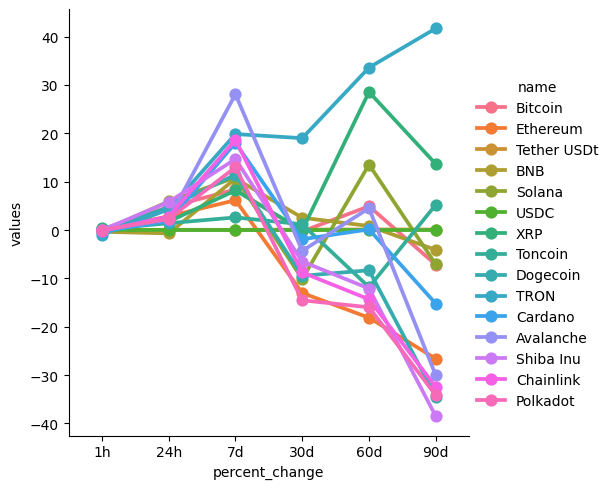

In [79]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [86]:
df10=df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,64101.06748,2024-08-24 15:01:49.346366+08:00
15,Bitcoin,64101.06748,2024-08-24 15:02:10.296504+08:00
30,Bitcoin,64113.92656,2024-08-24 15:03:10.644845+08:00
45,Bitcoin,64143.98656,2024-08-24 15:04:10.998305+08:00
60,Bitcoin,64143.98656,2024-08-24 15:05:11.368272+08:00
75,Bitcoin,64186.00486,2024-08-24 15:06:11.725991+08:00


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

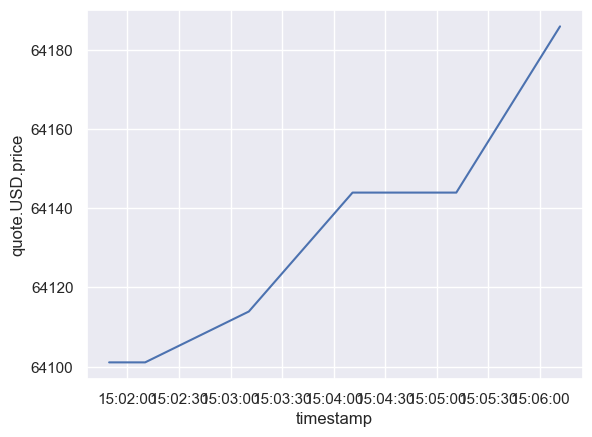

In [88]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)